In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('ex2data2.txt', names=['Test1', 'Test2', 'Accepted'])
data.head()

,Test1,Test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


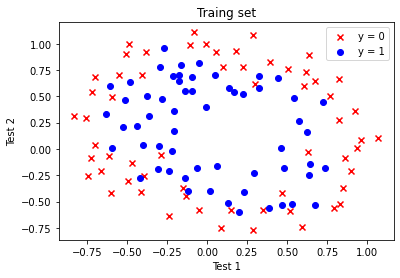

In [3]:
fig, ax = plt.subplots()
ax.scatter(data[data['Accepted'] == 0]['Test1'], data[data['Accepted'] == 0]['Test2'], c='r', marker='x', label='y = 0')
ax.scatter(data[data['Accepted'] == 1]['Test1'], data[data['Accepted'] == 1]['Test2'], c='b', marker='o', label='y = 1')
ax.legend()
ax.set(xlabel = 'Test 1', ylabel = 'Test 2', title = 'Traing set')
plt.show()

## 特征映射

In [29]:
def mapFeature(x1, x2, power):
    data = {}
    for i in range(power + 1):
        for j in range(i + 1):
            data[f'F{i - j}{j}'] = np.power(x1, i - j) * np.power(x2, j)
            
    return pd.DataFrame(data)

In [30]:
x1 = data['Test1']
x2 = data['Test2']

In [37]:
data2 = mapFeature(x1, x2, 6)

In [38]:
data2.head()

,F00,F10,F01,F20,F11,F02,F30,F21,F12,F03,...,F23,F14,F05,F60,F51,F42,F33,F24,F15,F06
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


## 构造数据集

In [39]:
X = data2.values
X.shape

(118, 28)

In [40]:
data

,Test1,Test2,Accepted
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
...,...,...,...
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0


In [41]:
y = data.iloc[:, -1].values
y = y.reshape(len(y), 1)
y.shape

(118, 1)

## 假设函数

In [11]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## 代价函数

In [12]:
def costFunction(X, y, theta, lamda):
    g = sigmoid(X @ theta)
    first = y * np.log(g)
    second = (1 - y) * np.log(1 - g)
    
    reg = np.sum(np.power(theta[1:], 2)) * lamda / (2 * len(X))
    
    return -np.sum(first + second) / len(X) + reg

In [13]:
theta = np.zeros((X.shape[1], 1))
theta.shape

(28, 1)

In [45]:
lamda = 1

In [46]:
cost_init = costFunction(X, y, theta, lamda)
cost_init

0.6931471805599454

## 梯度下降法

In [47]:
def gradientDescent(X, y, theta, iters, alpha, lamda):
    m = len(X)
    costs = []
    
    for i in range(iters):
        reg = theta[1:] * (lamda / m)
        reg = np.insert(reg, 0, values=0, axis=0)
        
        g = sigmoid(X @ theta)
        theta = theta - (alpha / m) * (X.T @ (g - y)) - reg
        cost = costFunction(X, y, theta, lamda)
        costs.append(cost)
        if i % 1000 == 0:
            print(cost)
            
    return costs, theta

In [77]:
alpha = 0.001
iters = 200000
lamda = 0.001

In [78]:
costs, theta_final = gradientDescent(X, y, theta, iters, alpha, lamda)

0.693134380798985
0.6818650671550655
0.672748697667896
0.6649382350210216
0.6579891999128368
0.6516587811169662
0.645806149345912
0.6403433508679413
0.6352109729552581
0.6303658897986846
0.625774925450325
0.6214114460854341
0.6172534280039077
0.613282288876784
0.6094821289408
0.6058392039109464
0.6023415373766955
0.598978623166525
0.5957411897406796
0.5926210098409752
0.5896107446192148
0.5867038148430397
0.5838942938016073
0.5811768178314223
0.5785465112720828
0.575998923306738
0.5735299746304318
0.5711359122705992
0.5688132711873028
0.5665588415252293
0.5643696405879911
0.5622428887672919
0.5601759887921506
0.5581665077721994
0.5562121615984903
0.5543108013388565
0.5524604013255084
0.5506590486826008
0.5489049340828341
0.547196343556383
0.5455316512037752
0.5439093126878609
0.5423278593995745
0.5407858932084394
0.5392820817223566
0.5378151539925351
0.536383896608914
0.5349871501393716
0.5336238058727042
0.5322928028309695
0.5309931250215412
0.5297237989032203
0.528483891044156
0.5272

In [79]:
theta_final

array([[ 1.2052072 ],
       [ 0.5825871 ],
       [ 1.13133192],
       [-1.92011714],
       [-0.83055737],
       [-1.28494641],
       [ 0.10189184],
       [-0.34252061],
       [-0.3413474 ],
       [-0.18126064],
       [-1.40955679],
       [-0.06604286],
       [-0.58032027],
       [-0.2460958 ],
       [-1.14671096],
       [-0.24322073],
       [-0.20113005],
       [-0.05872139],
       [-0.25848869],
       [-0.27166559],
       [-0.4910192 ],
       [-1.01575376],
       [ 0.01109593],
       [-0.28015729],
       [ 0.00479456],
       [-0.30974881],
       [-0.12601945],
       [-0.94013426]])

In [80]:
def predict(X, theta):
    prob = sigmoid(X @ theta)
    return [1 if x >= 0.5 else 0 for x in prob]

In [81]:
y_ = np.array(predict(X, theta_final))
y_pre = y_.reshape(len(y_), 1)
acc = np.mean(y_pre == y)
acc

0.8305084745762712

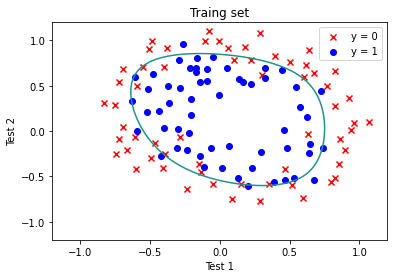

In [76]:
x = np.linspace(-1.2, 1.2, 200)
xx, yy = np.meshgrid(x, x)
z = mapFeature(xx.ravel(), yy.ravel(), 6).values

zz = z @ theta_final
zz = zz.reshape(xx.shape)

fig, ax = plt.subplots()
ax.scatter(data[data['Accepted'] == 0]['Test1'], data[data['Accepted'] == 0]['Test2'], c='r', marker='x', label='y = 0')
ax.scatter(data[data['Accepted'] == 1]['Test1'], data[data['Accepted'] == 1]['Test2'], c='b', marker='o', label='y = 1')
ax.legend()
ax.set(xlabel = 'Test 1', ylabel = 'Test 2', title = 'Traing set')

plt.contour(xx, yy, zz, 0)
plt.show()